In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [3]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)

y = pd.Series(boston.target)

In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y[:10]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
reg = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1)

reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1, max_depth=2, n_estimators=3)

In [8]:
y_pred = reg.predict(X_test)

In [9]:
r2_score(y_test, y_pred)

0.7907824824684473

<BarContainer object of 13 artists>

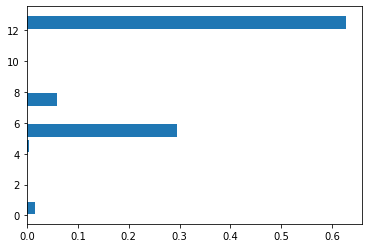

In [19]:
import matplotlib.pyplot as plt
feature_imp = reg.feature_importances_

sorted_idx = np.argsort(feature_imp*100)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_imp)

In [14]:
 np.argsort(feature_imp)

array([ 1,  2,  3,  6,  8,  9, 10, 11,  4,  0,  7,  5, 12], dtype=int64)

In [20]:
np.sum(feature_imp)

0.9999999999999998